In [2]:
#IMDB==MOVIES RATING DATA

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
imdb=pd.read_csv("/content/imdb_data.csv")

In [8]:
imdb

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021",Adam Robitel


In [9]:
#lets check the data is load or not,check first 5 rows.

In [10]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [11]:
#basic information about datset

In [12]:
imdb.info()  # to check the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


# INSIGHTS
-- the dataset contain 3348 rows and 12 columns

--there are 6 object data type,4 integers and 2 float columns.

-- is adult column showing integer,we need to convert this yes and no format to analyze the data properly.

-- release data columns is an object,which should be convert to date time format or we seperate the data ,year and month for better analysis.

In [13]:
#lets check for the missing values.

In [14]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


INSIGHTS
-- gross(51 missing values)

-- gross represents total earning of a movies missing values may indicates that data was unavailable or the movie is underperformeed.

--possible solution : 1)missing values replace with mean or median
                      2)drop rows with missing values-51 rows will be dropped from the dataset.
                      3)if budget is availabl,then we estimate the gross using a median.

  -- missing dates--incomplete record.

  --possible solution--drop the rows.
  

In [15]:
# lets replace the missing values of gross with KNN imputation. ( knn is a part of machine learning )

THEORY :----
 KNN means taking  a nearest values

 -- if suppose we have two data so knn will take the nearest values of them.

In [16]:
# import the libraries for KNN

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer=KNNImputer(n_neighbors=5)   # we can change the neghbour number

In [19]:
imdb[["budget","gross"]]=imputer.fit_transform(imdb[["budget","gross"]])

In [20]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [21]:
#drop the release date rows

In [22]:
imdb=imdb.dropna(subset=["release_date"]) #dropna =na is null value , subset =use for check na values and drop rows ,(not the entire column)

In [23]:
imdb.shape

(3343, 12)

# insights
-- after succesfullly removing the null values we have clean dataset.

-- total 3343 rows and 12 columns.

-- so lets start to do

***## EXPLORATORY DATA ANALYSIS (EDA) :---- ***

**QUE1) Lets find out how many unique movies are in the dataset?**


In [24]:
imdb["id"].unique()   # unique=checking unique data

array(['tt0035423', 'tt0065421', 'tt0065938', ..., 'tt9784798',
       'tt9844522', 'tt9893250'], dtype=object)

# INSIGHTS

--We have 3343 unique movies so that mean we do not have any duplicated values in the dataset.

**QUE 2) What is the overall distribution of movies runtimes ? ( #runtime=hours of the movie ......)**

Text(0.5, 1.0, 'distribution of movie runtime')

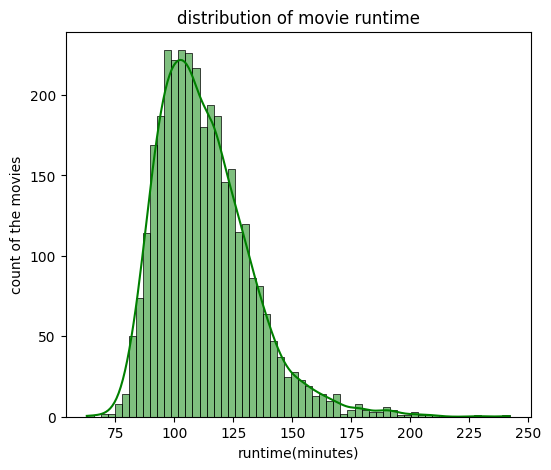

In [25]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["runtimeMinutes"],bins=60,kde=True,color="green") #kde=show the skew on the graph
plt.xlabel("runtime(minutes)")
plt.ylabel("count of the movies")
plt.title("distribution of movie runtime")

#INSIGHTS

--as we see the distribution ,it seems like normal distribution ,but lets check for the outliers also.



In [26]:
#draw the box plot

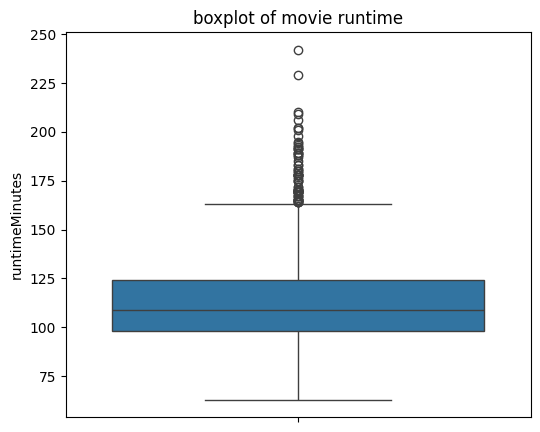

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["runtimeMinutes"])
plt.title("boxplot of movie runtime")
plt.savefig('runtime.jpg',dpi=300)  #savefig=if we want to share the plot with manager at that time we use the savefig cmmand.

**QUE 3) How many movies are marked as"adult"(isadult=1) vs non-adult(isadult=0)**
      #**[isadult=below 18 ]**

In [28]:
imdb.head(2)  #head=checking data as sample.

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman


In [29]:
imdb["isAdult"].unique()

array([0])

#INSIGHTS

-as we can see we have only one category in adult section,that mean all movies is only for adult so for better analysis ,we drop the column.

In [30]:
imdb.drop(columns=['isAdult'],inplace=True)  #drop:drop the column #inplace=for delete permntly

<ipython-input-30-13834ffc0c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb.drop(columns=['isAdult'],inplace=True)  #drop:drop the column #inplace=for delete permntly


In [31]:
imdb.isnull().sum() #isnull().sum()=for checking the data that isadult delted or not

,0
id,0
primaryTitle,0
originalTitle,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0
release_date,0


**QUE 4)What are the top 10 most common movie genres? (generes=movie category)**

In [32]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [33]:
#as we check,in genres ,we have more than one category like ,comedy,fantacy and remance so we need to seprate the category

In [34]:
genres_list=imdb["genres"].str.split(",").explode()    #str=its a category form , #split=want to split(divide with comma),explode=and explode the data

In [35]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [36]:
genres_count=genres_list.value_counts() #value_counts= used for how many values/number/data in one category

In [37]:
genres_count

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


In [38]:
#we want top 10 movies

In [39]:
genres_count.head(10)  #head=top 10 data from beginning

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


In [40]:
#draw bar plot

<ipython-input-41-d370ea2feed2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.index,y=genres_count.values,palette="Set1")


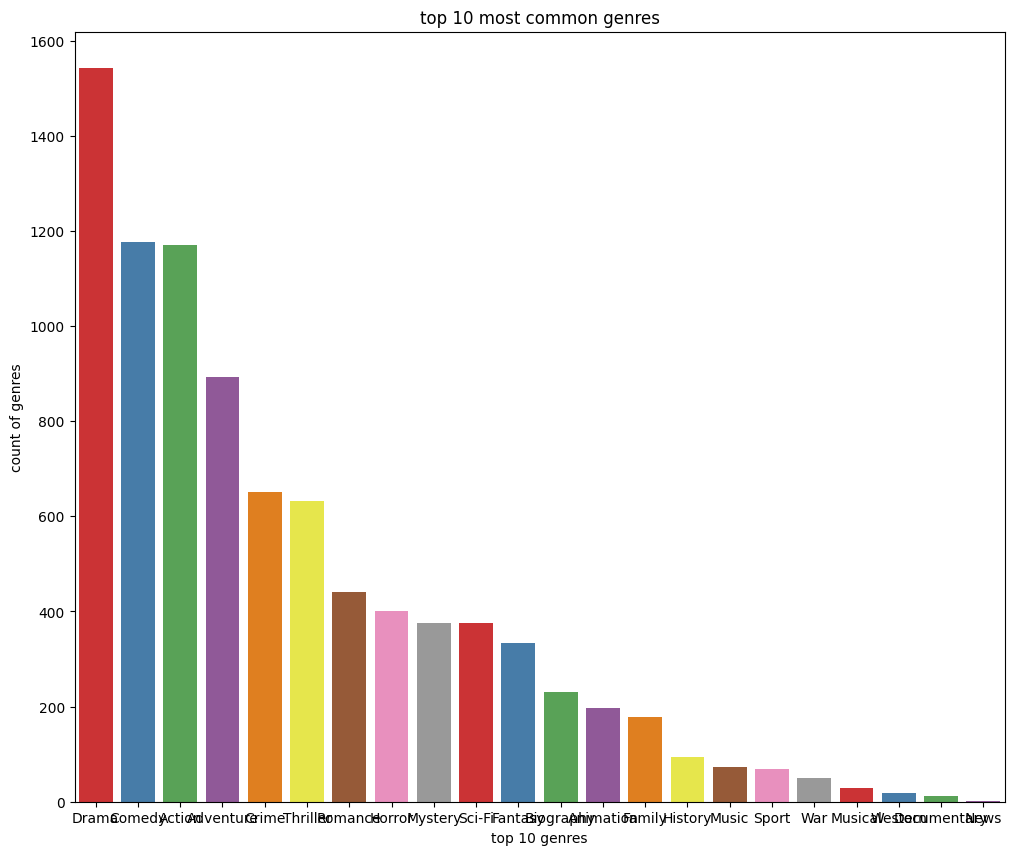

In [41]:
plt.figure(figsize=(12,10))
sns.barplot(x=genres_count.index,y=genres_count.values,palette="Set1")
plt.xlabel('top 10 genres')
plt.ylabel("count of genres")
plt.title("top 10 most common genres")
plt.savefig("top 10 movies",dpi=400)

#INSIGHTS

-- drama is the most dominant genre with 1542 movies.

--comedy and action are almost equal ~1170.

-- advantures,crime and thriller are strong contenders.

-- romance,horror ,mystry and si-fi are mid tier genres.

QUE 5) what is the distribution of average rating ?are ratings skewed toward high or low values ?

In [42]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [43]:
#draw histogram plot

Text(0, 0.5, 'counts')

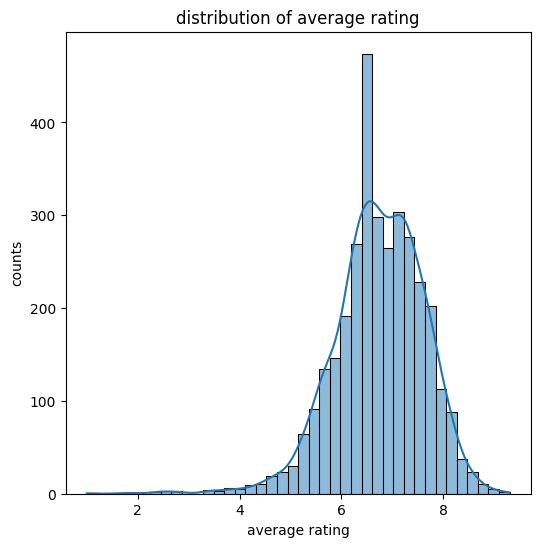

In [44]:
plt.figure(figsize=(6,6))
sns.histplot(imdb["averageRating"],bins=40,kde=True)
plt.title("distribution of average rating")
plt.xlabel("average rating")
plt.ylabel("counts")

In [45]:
#lets see how many movies are very low and high rated

In [46]:
#draw boxplot

Text(0.5, 1.0, 'boxplot of average rating ')

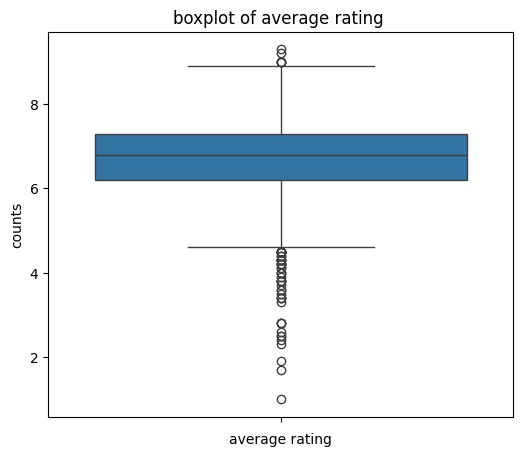

In [47]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["averageRating"])
plt.xlabel("average rating")
plt.ylabel("counts")
plt.title("boxplot of average rating ")

In [48]:
#lets find out the outlier

In [49]:
Q1=imdb["averageRating"].quantile(0.25)

In [50]:
Q3=imdb["averageRating"].quantile(0.75)

In [51]:
IQR=Q3-Q1

In [52]:
lower_bond=Q1-1.5*IQR

In [53]:
lower_bond

np.float64(4.550000000000001)

In [54]:
upper_bond=Q3+1.5*IQR

In [55]:
upper_bond

np.float64(8.95)

In [56]:
clean_data_for_avaragerating = imdb[(imdb["averageRating"] <= upper_bond)& (imdb["averageRating"]>=lower_bond)]


In [57]:
clean_data_for_avaragerating

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000.0,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000.0,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000.0,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,107,Drama,7.3,175977,5000000.0,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,138,"Action,Adventure,Drama",6.6,220617,200000000.0,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,126,"Biography,Drama,History",7.4,88568,26000000.0,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,88,"Action,Adventure,Horror",5.7,56955,15000000.0,65774490.0,"July 1, 2021",Adam Robitel


In [58]:
#draw the histogram plot

Text(0, 0.5, 'counts')

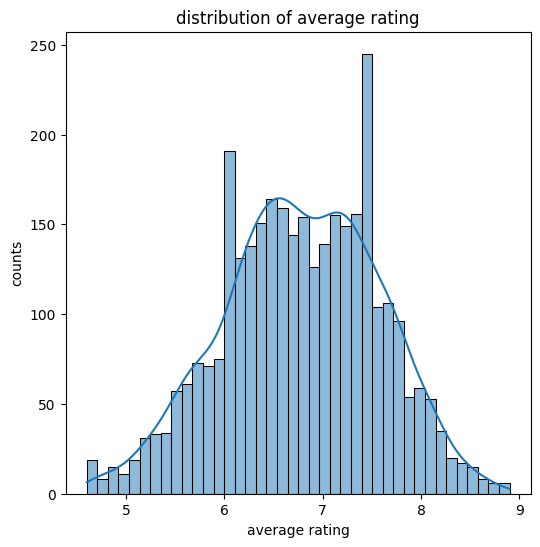

In [59]:
plt.figure(figsize=(6,6))
sns.histplot(clean_data_for_avaragerating["averageRating"],bins=40,kde=True)
plt.title("distribution of average rating")
plt.xlabel("average rating")
plt.ylabel("counts")

In [60]:
#draw boxplot

Text(0.5, 1.0, 'boxplot of avaerage rating')

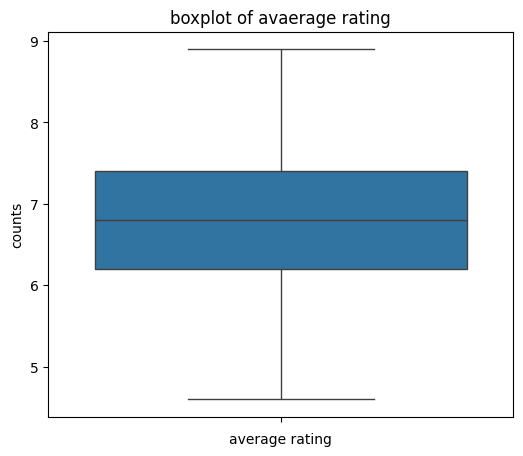

In [61]:
plt.figure(figsize=(6,5))
sns.boxplot(clean_data_for_avaragerating["averageRating"])
plt.xlabel("average rating")
plt.ylabel("counts")
plt.title("boxplot of avaerage rating")

INSIGHTS

--most movies are well rated.

--the majority of rating are above 6 to 8 indication positive bias in user reviews.

--some movies are high rated looks like outliers.

-- there are fewer low rated movies,looks outliers ,meanng people dont bother to rate them,low rated movies -probably dislike by audience.

QUE 6) how many movies have received over 100000 votes(numvotes>100,000)

In [62]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [63]:
high_votes_movies=imdb[imdb["numVotes"]>100000]

In [64]:
high_votes_movies.shape  #shape=how many rows and columns are present in the dataset.

(2099, 11)

In [65]:
#histogram plot

Text(0.5, 1.0, 'distribution of movies votes')

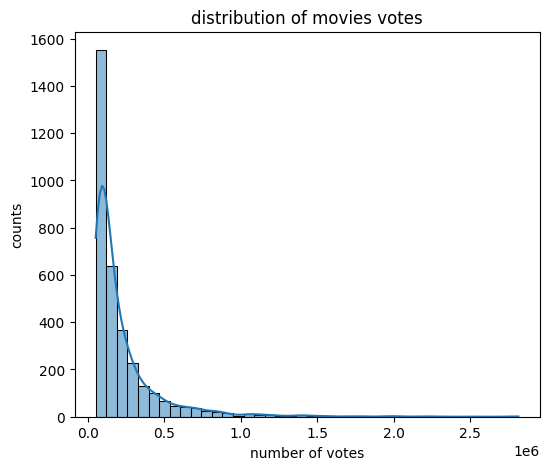

In [66]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["numVotes"],bins=40,kde=True)
plt.xlabel("number of votes")
plt.ylabel("counts")
plt.title("distribution of movies votes")


#insights
 ----The distribution is right-skewed, meaning most movies have fewer votes, while only a few have very high votes.
2️⃣ A majority of movies received low to moderate votes, indicating that only a small percentage of movies gain massive audience attention.
3️⃣ There are outliers (movies with an exceptionally high number of votes), likely popular blockbusters or classics with a strong fanbase.
4️⃣ The KDE line suggests a smooth trend where vote counts gradually decrease as the number of votes increases.

**QUE 7) What is the ditribution of movies budgets?**


In [67]:
imdb.head(1)  #head=checking as sample

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [68]:
#draw istogramplot

Text(0.5, 1.0, 'distribution of movies budget')

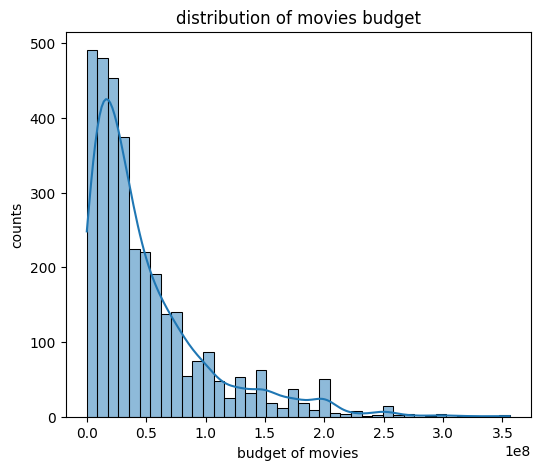

In [69]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

INSIGHTS

--the budget distribution is right skewed.
--many movies has low budget movies.
-- few movies only had high budget.

In [70]:
#lets check how many movies have hugh budget(find outliers)

In [71]:
#fraw boxplot

Text(0.5, 1.0, 'boxplot of movie budget')

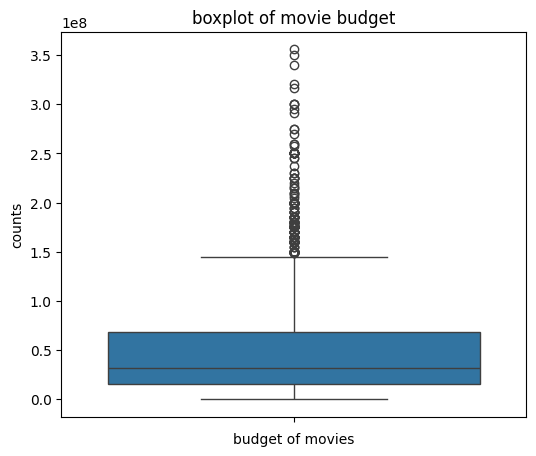

In [72]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [73]:
Q1=imdb["budget"].quantile(0.25)

In [74]:
Q3=imdb['budget'].quantile(0.75)

In [75]:
IQR=Q3-Q1

In [76]:
upper_bond=Q3+1.5*IQR

In [77]:
upper_bond

np.float64(147500000.0)

In [78]:
budget_clean_data=imdb[(imdb["budget"]<=upper_bond)]

In [79]:
#draw histogram

Text(0.5, 1.0, 'distribution of movies budget')

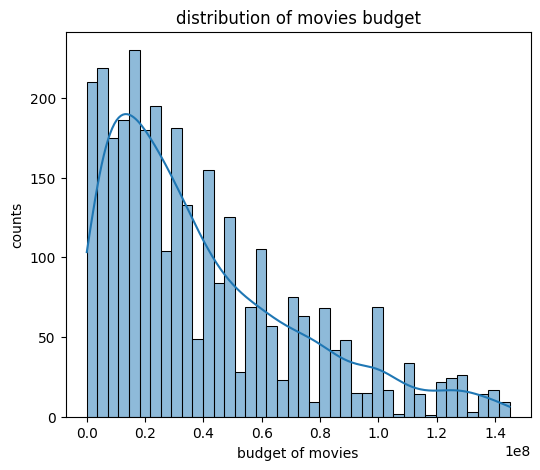

In [80]:
plt.figure(figsize=(6,5))
sns.histplot(budget_clean_data["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

In [81]:
#draw boxplot

Text(0.5, 1.0, 'boxplot of movie budget')

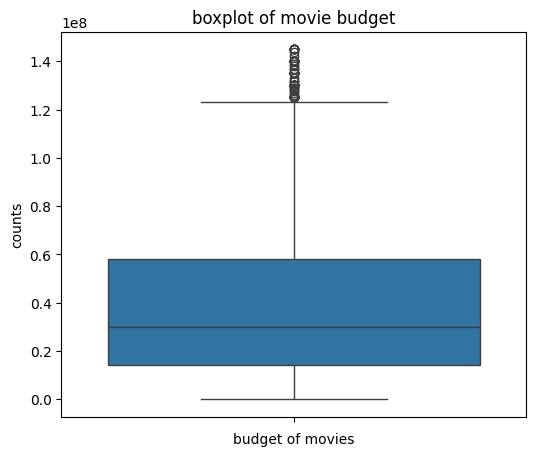

In [82]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_clean_data["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [83]:
#find outlier again

In [84]:
Q1=budget_clean_data['budget'].quantile(0.25)

In [85]:
Q3=budget_clean_data['budget'].quantile(0.75)


In [86]:
IQR=Q3-Q1

In [87]:
upper_bond=Q3+1.5*IQR

In [88]:
budget_fresh=budget_clean_data[(budget_clean_data["budget"]<=upper_bond)]

Text(0.5, 1.0, 'boxplot of movie budget')

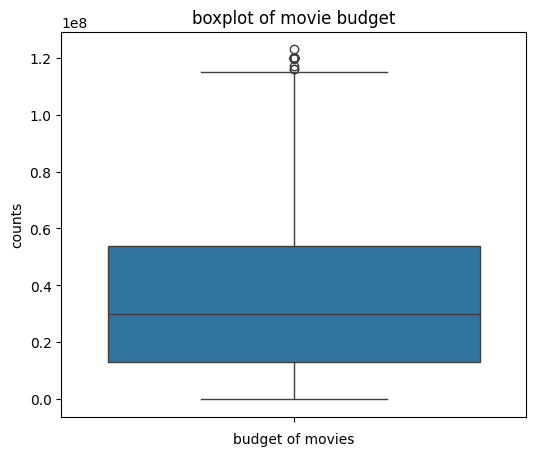

In [89]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_fresh["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [90]:
#find outlier again

In [91]:
Q1=budget_fresh['budget'].quantile(0.25)

In [92]:
Q3=budget_fresh['budget'].quantile(0.75)

In [93]:
IQR=Q3-Q1


In [94]:
upper_bond=Q3+1.5*IQR

In [95]:
budget_fresh_2=budget_fresh[(budget_fresh["budget"]<=upper_bond)]

Text(0.5, 1.0, 'boxplot of movie budget')

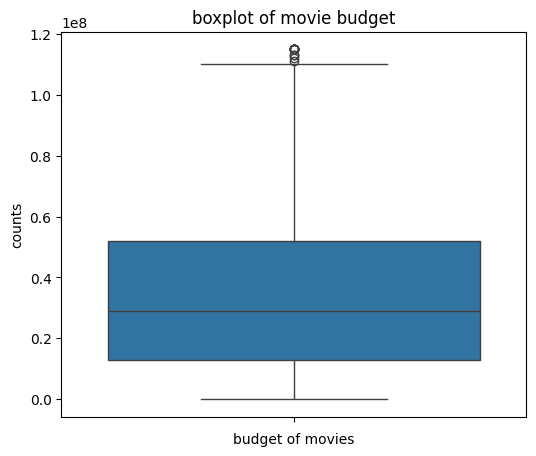

In [96]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_fresh_2["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

Text(0.5, 1.0, 'distribution of movies budget')

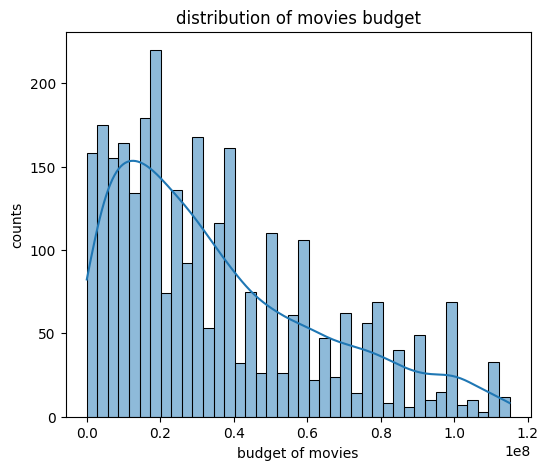

In [97]:
plt.figure(figsize=(6,5))
sns.histplot(budget_fresh_2["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

#insights
--Most movies have small to moderate budgets, while a few high-budget movies dominate the industry.

--The distribution is likely right-skewed, meaning big-budget movies are rare but significantly impact the industry.

--
Further analysis can help identify the median budget and common budget range for most films.





***QUE 8) what is the ditribution of gross revenue? ***




In [98]:
imdb.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [99]:
#drwa hist plot

Text(0.5, 1.0, 'ditribution of gross revenue')

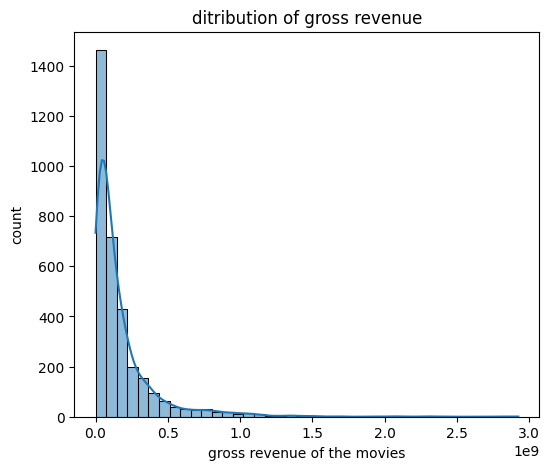

In [100]:
plt.figure(figsize=(6,5))
sns.histplot(x=imdb["gross"],bins=40,kde=True)
plt.xlabel("gross revenue of the movies")
plt.ylabel("count")
plt.title("ditribution of gross revenue")

In [101]:
#lets check how many movies have high gross revenue

Text(0.5, 1.0, 'bx plot of gross revenue')

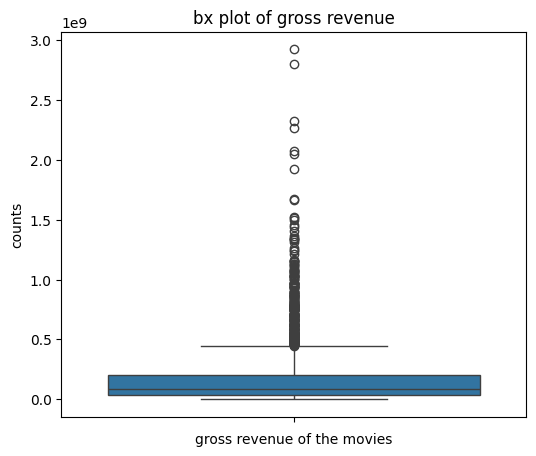

In [102]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb['gross'])
plt.xlabel("gross revenue of the movies")
plt.ylabel("counts")
plt.title('bx plot of gross revenue')

#insights

--gross revenue distribution is  right skewed.

--a few blockbuster movies had earning massive amount

-- there outliers movies with extreme earnings.

**QUE 10) What is the average budget and gross revenue of movies?**

In [103]:
avg_budget=imdb["budget"].mean()

In [104]:
avg_gross=imdb["gross"].mean()

In [105]:
avg_budget

np.float64(50425817.86299731)

In [106]:
avg_gross

np.float64(167729001.37349686)

In [107]:
#draw bar plot

<ipython-input-108-a555d0ead347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["avg_budget","avg_gross"],y=[avg_budget,avg_gross],palette="Set1")  #y=put values in y column


Text(0.5, 1.0, 'comparision of avg budget vs gross')

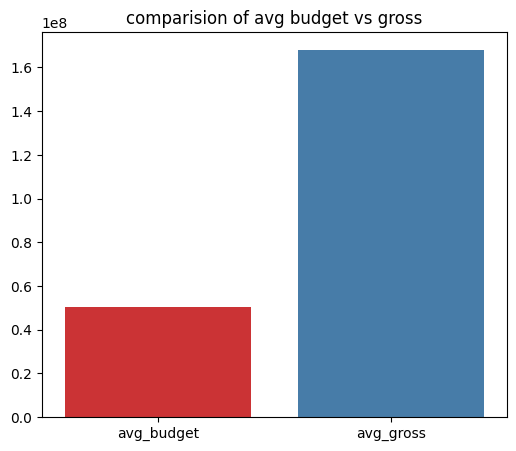

In [108]:
plt.figure(figsize=(6,5))
sns.barplot(x=["avg_budget","avg_gross"],y=[avg_budget,avg_gross],palette="Set1")  #y=put values in y column
plt.title("comparision of avg budget vs gross")

#insights

--average gross exceed the average budget indicating overall profitability.

**QUE 10) Is there a significant correlation between budget and gross revenue?**

In [109]:
corr_matrix=imdb[["budget","gross"]].corr()

In [110]:
corr_matrix

,budget,gross
budget,1.000000,0.699016
gross,0.699016,1.000000


In [111]:
#draw heatmap beacuse it is a correlation

Text(0.5, 1.0, 'correlation between budget and gross revenue')

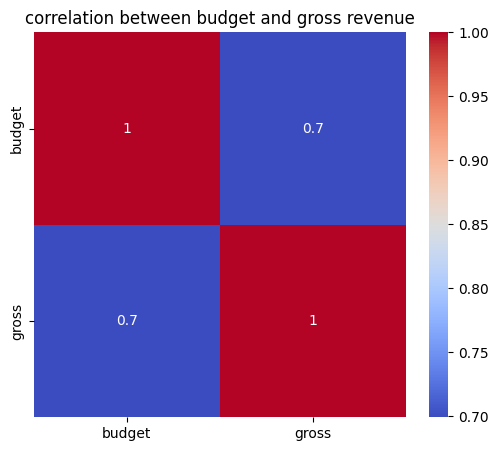

In [112]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation between budget and gross revenue")

INSIGHTS

-- strong positive correlation btween the budget and the gross  ~0.699

-- this means higher budget movies tends to greater higher revenue.

**QUE 11) do high budget movies tend to have higher ratings?**

In [113]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [114]:
corr_matrix=imdb[['budget','averageRating']].corr()

In [115]:
corr_matrix

,budget,averageRating
budget,1.000000,-0.079107
averageRating,-0.079107,1.000000


In [116]:
#draw heatmap ,it is corr

Text(0.5, 1.0, 'correlation between budgt and ratings')

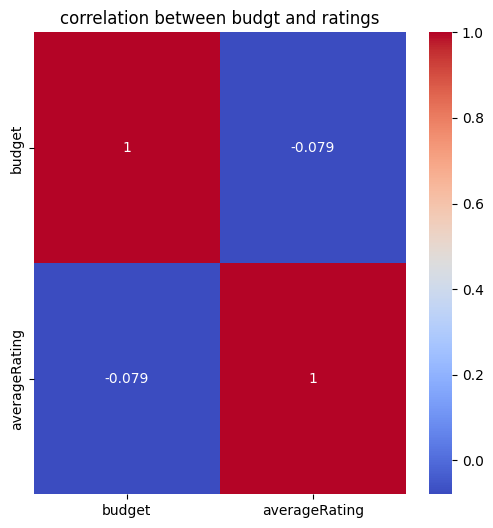

In [117]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation between budgt and ratings")

INSIGHTS

-- weak nrgative corrrelation ~0.079

--suggest almost no relationship between budget and ratings.

**QUE 12) which are the top 10 highest grossing movies?**

In [118]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [119]:
top_gross=imdb[["primaryTitle",'gross']].sort_values(by='gross',ascending=False).head(10)

In [120]:
top_gross

,primaryTitle,gross
1762,Avatar,2.923706e+09
3055,Avengers: Endgame,2.799439e+09
2514,Avatar: The Way of Water,2.320250e+09
726,Titanic,2.264743e+09
2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09
3054,Avengers: Infinity War,2.052415e+09
2051,Spider-Man: No Way Home,1.921847e+09
1368,Jurassic World,1.671537e+09
3201,The Lion King,1.663075e+09
1859,The Avengers,1.520539e+09


In [121]:
#draw barplot

<ipython-input-122-bf6c3a026cee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gross['gross'],y=top_gross['primaryTitle'],palette="viridis")


Text(0.5, 1.0, 'top 10 highest grosssing movies')

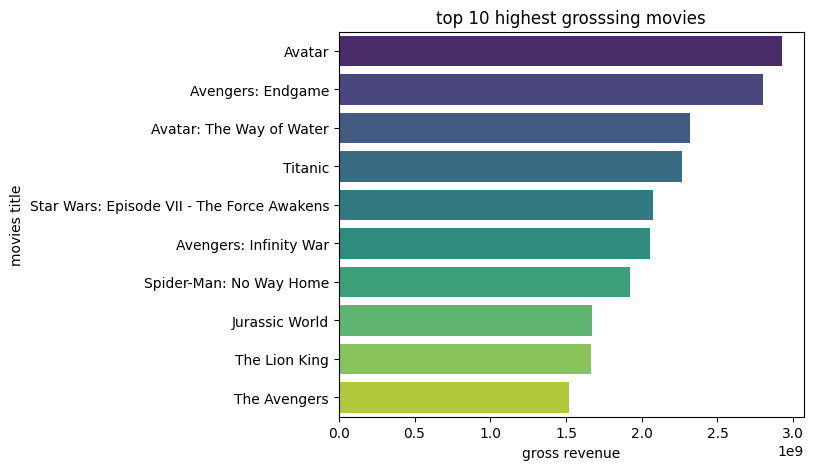

In [122]:
plt.figure(figsize=(6,5))
sns.barplot(x=top_gross['gross'],y=top_gross['primaryTitle'],palette="viridis")
plt.xlabel("gross revenue")
plt.ylabel("movies title")
plt.title("top 10 highest grosssing movies")

INSIGHTS

--The highest-grossing movie clearly stands out, showing its massive box office impact.

--There may be a strong dominance of franchises in the top 10, emphasizing the power of sequels.

--Revenue drops significantly between the highest-grossing and lower-ranked movies, indicating that only a few movies achieve massive box office success.

**QUE 13) Which are the top 10 most profitable movies (profit=gross-budget) ?**

In [123]:
imdb['profit']=imdb['gross']-imdb['budget']

<ipython-input-123-5381ccc3ae92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['profit']=imdb['gross']-imdb['budget']


In [124]:
top_profit=imdb.sort_values(by='profit',ascending=False).head(10)

In [125]:
top_gross

,primaryTitle,gross
1762,Avatar,2.923706e+09
3055,Avengers: Endgame,2.799439e+09
2514,Avatar: The Way of Water,2.320250e+09
726,Titanic,2.264743e+09
2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09
3054,Avengers: Infinity War,2.052415e+09
2051,Spider-Man: No Way Home,1.921847e+09
1368,Jurassic World,1.671537e+09
3201,The Lion King,1.663075e+09
1859,The Avengers,1.520539e+09


In [126]:
#draw bar plot

<ipython-input-127-aa40db841967>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit['profit'],y=top_profit["primaryTitle"],palette="viridis")


Text(0.5, 1.0, 'top 10 highest profitable movies')

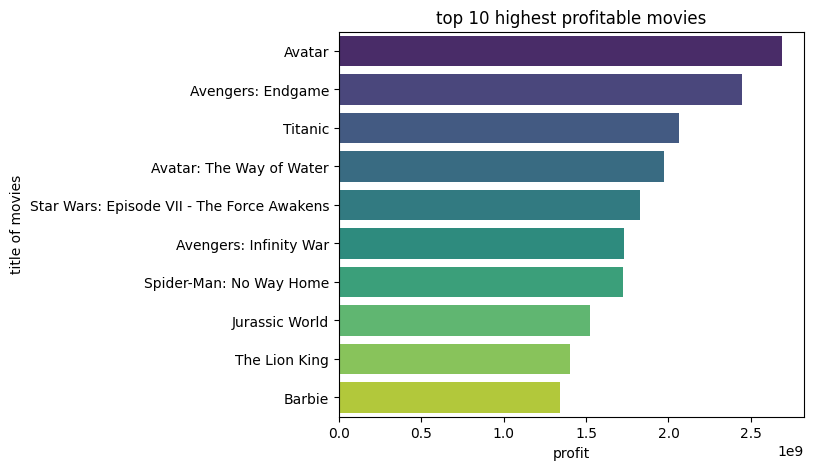

In [127]:
plt.figure(figsize=(6,5))
sns.barplot(x=top_profit['profit'],y=top_profit["primaryTitle"],palette="viridis")
plt.xlabel("profit")
plt.ylabel("title of movies")
plt.title("top 10 highest profitable movies")

INSIGHTS

-- Some low-budget movies can be highly profitable, sometimes even more than expensive blockbusters.

--The highest-grossing movies aren’t always the most profitable, as budget plays a key role in profitability.

--Certain genres (e.g., horror, thriller, and indie films) tend to achieve high profits with small investments.

--Understanding budget vs. revenue trends can help studios optimize future movie investments.

**QUE 14) Are the movies with a higher number of votes (numvotes) more profitable?**

In [128]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [129]:
corr_matrix=imdb[['numVotes',"profit"]].corr()

In [130]:
corr_matrix

,numVotes,profit
numVotes,1.000000,0.528258
profit,0.528258,1.000000


In [131]:
#draw heatmap

Text(0.5, 1.0, 'correlation butween the profit and the votes')

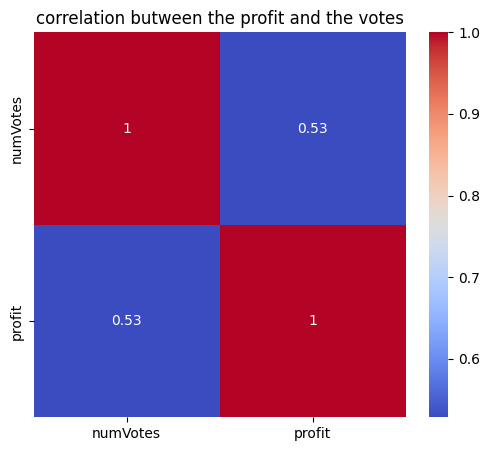

In [132]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation butween the profit and the votes")

#insights

-- the correlation between the number of votes and the profit is 0.53 which indicates moderate positive correlation.

**QUE 15) Which genres has the highest no of movies ?**

In [133]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [ ]:
#as we check,in genres ,we have more than one category like ,comedy,fantacy and romance so we need to seprate the category

In [134]:
genres_list=imdb["genres"].str.split(",").explode()

In [135]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [146]:
genres_count=genres_list.value_counts()

In [147]:
genres_count

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


In [139]:
#we want highest movies ,will use head()

In [152]:
top_10_genres=genres_count.head(10)

In [142]:
#draw bar plot

<ipython-input-153-57869c09cabe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index,y=top_10_genres.values,palette="Set1")


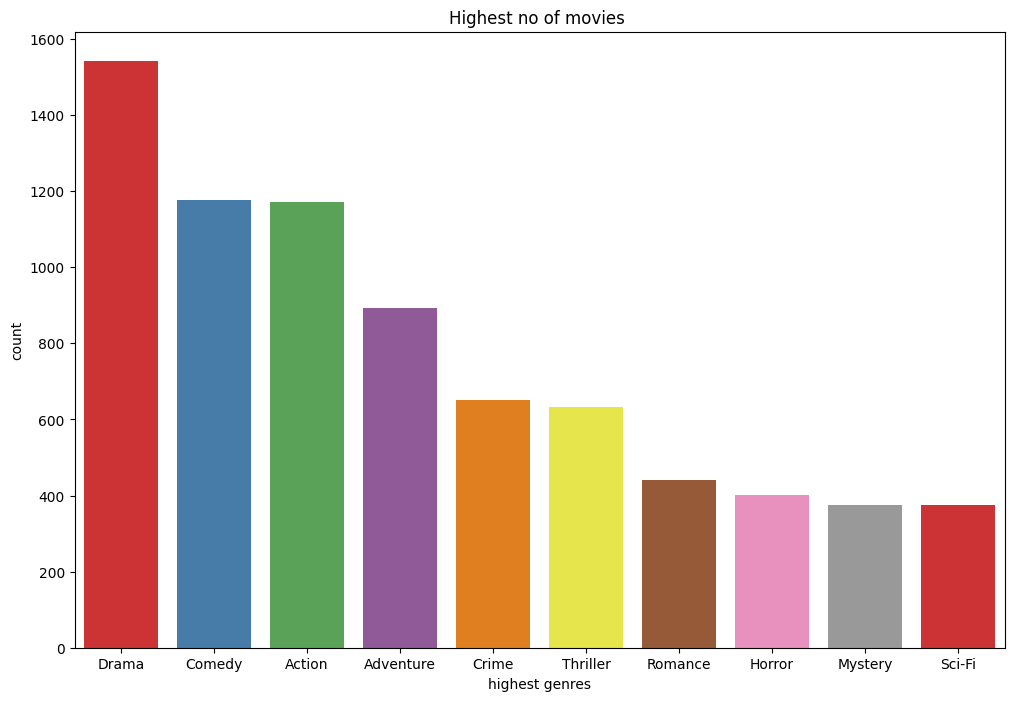

<Figure size 640x480 with 0 Axes>

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_genres.index,y=top_10_genres.values,palette="Set1")
plt.xlabel("highest genres")
plt.ylabel("count")
plt.title("Highest no of movies ")
plt.show() #to properly display the graph on the screen.
plt.savefig("top 10 genres")

#INSIGHTS

---- drama is the most dominant genre with 1542 movies.

--comedy and action are almost equal ~1170.

-- advantures,crime and thriller are strong contenders.

-- romance,horror ,mystry and si-fi are mid tier genres.

**QUE 16) What are the average budget and gross revenue per genres?**

In [154]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [155]:
#we are going to create a new variable for genre = new_df

In [156]:
new_df=imdb.copy()

In [158]:
new_df["genres"]=new_df['genres'].str.split(',')

In [161]:
new_df.head(1) #check the genres column [divided with column]

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"[Comedy, Fantasy, Romance]",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [163]:
new_df=new_df.explode("genres")

In [164]:
new_df

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Fantasy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Romance,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
1,tt0065421,The Aristocats,The AristoCats,78,Adventure,7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman,31459543.0
1,tt0065421,The Aristocats,The AristoCats,78,Animation,7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman,31459543.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,88,Adventure,5.7,56955,15000000.0,65774490.0,"July 1, 2021",Adam Robitel,50774490.0
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,88,Horror,5.7,56955,15000000.0,65774490.0,"July 1, 2021",Adam Robitel,50774490.0
3347,tt9893250,I Care a Lot,I Care a Lot,118,Comedy,6.4,141433,14000000.0,1351662.0,"September 12, 2020",J Blakeson,-12648338.0
3347,tt9893250,I Care a Lot,I Care a Lot,118,Crime,6.4,141433,14000000.0,1351662.0,"September 12, 2020",J Blakeson,-12648338.0


In [171]:
avg_rev_gross=new_df.groupby("genres")[['budget',"gross"]].mean().sort_values(by="gross",ascending=False)

In [173]:
#sort=for a single column, and sort_values for multiple column

In [172]:
avg_rev_gross

,budget,gross
genres,,
Animation,9.261869e+07,3.718782e+08
Adventure,9.342321e+07,3.240299e+08
Family,7.331553e+07,2.584685e+08
Sci-Fi,7.823706e+07,2.486523e+08
Fantasy,7.262359e+07,2.438574e+08
Action,7.749185e+07,2.354541e+08
Comedy,4.518031e+07,1.572124e+08
Musical,3.950357e+07,1.494457e+08
Thriller,4.132095e+07,1.345612e+08


In [174]:
avg_rev_gross=avg_rev_gross.head(10)

In [176]:
avg_rev_gross

,budget,gross
genres,,
Animation,9.261869e+07,3.718782e+08
Adventure,9.342321e+07,3.240299e+08
Family,7.331553e+07,2.584685e+08
Sci-Fi,7.823706e+07,2.486523e+08
Fantasy,7.262359e+07,2.438574e+08
Action,7.749185e+07,2.354541e+08
Comedy,4.518031e+07,1.572124e+08
Musical,3.950357e+07,1.494457e+08
Thriller,4.132095e+07,1.345612e+08


In [177]:
#draw bar plot

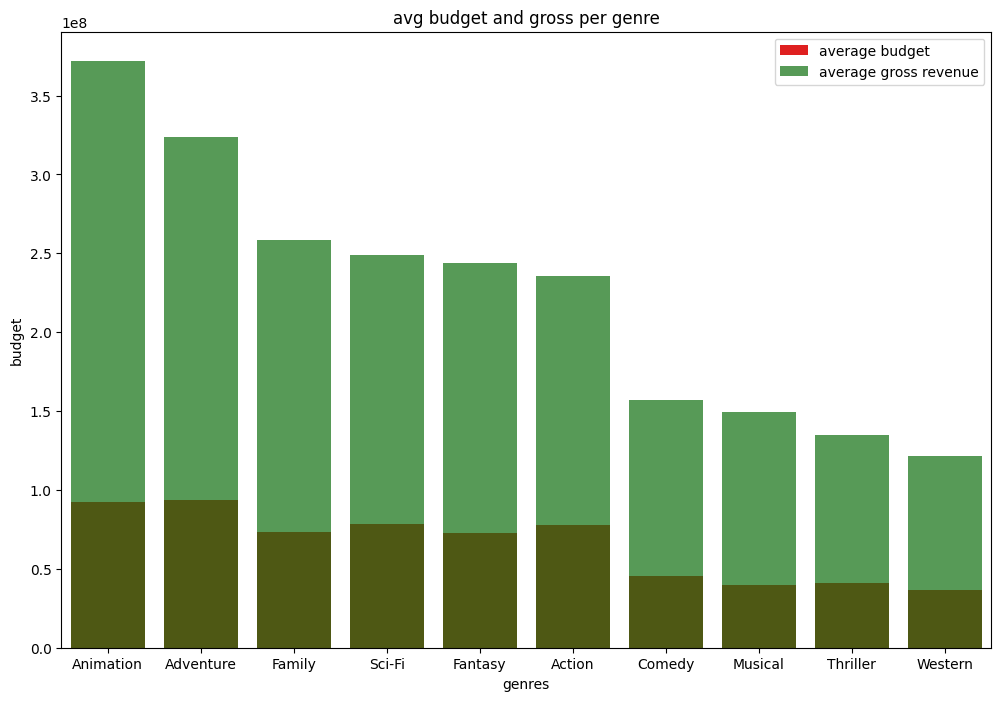

In [185]:
plt.figure(figsize=(12,8))
sns.barplot(data=avg_rev_gross,x="genres",y="budget",color="Red",label="average budget")
sns.barplot(data=avg_rev_gross,x="genres",y="gross",color="Green",alpha=0.7,label="average gross revenue") #alpha=margin
plt.ylabel=("average revenue")
plt.title("avg budget and gross per genre")
plt.savefig("genres.jpg",dpi=300)

INSIGHTS

--Most Popular Genres: Genres with the highest number of movies are likely Drama, Comedy, Action, Thriller, and Horror.

---Dominant Genre: The top genre (highest bar) has the most movies in the dataset.

--Industry Trends: If action or thriller is on top, the industry focuses on high-energy films. If drama or comedy dominates, storytelling and light entertainment are more common.

--Niche Genres: Genres with shorter bars (e.g., documentary, musical) are less common but may have dedicated audiences.

--Investment Insight: High movie count suggests more demand and production in that genre.

**QUE 17) Which genres has the highest average ratings?**

In [186]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [192]:
genres_avg_rating=new_df.groupby("genres")["averageRating"].mean().reset_index() #new_df has been already created , reset index=it is series thats why we use reset index

In [193]:
genres_avg_rating

,genres,averageRating
0,Action,6.559180
1,Adventure,6.650112
2,Animation,7.107576
3,Biography,7.301299
4,Comedy,6.580357
5,Crime,6.846012
6,Documentary,7.053846
7,Drama,7.054086
8,Family,6.566480
9,Fantasy,6.485928


In [199]:
top_genres_rating=genres_avg_rating.sort_values(by="averageRating",ascending=False)

In [200]:
#sort_values() is used to arrange data in ascending or descending order, making it easier to analyze and visualize trends.

In [205]:
top_genres_rating

,genres,averageRating
20,War,7.438776
15,News,7.400000
3,Biography,7.301299
10,History,7.233333
21,Western,7.216667
2,Animation,7.107576
13,Musical,7.075000
7,Drama,7.054086
6,Documentary,7.053846
12,Music,6.873973


In [206]:
top_10_gen_rating=top_genres_rating.head(10)

In [207]:
top_10_gen_rating

,genres,averageRating
20,War,7.438776
15,News,7.400000
3,Biography,7.301299
10,History,7.233333
21,Western,7.216667
2,Animation,7.107576
13,Musical,7.075000
7,Drama,7.054086
6,Documentary,7.053846
12,Music,6.873973


<ipython-input-208-bcbf6dcb2c82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_gen_rating,x="genres",y="averageRating",palette="viridis")


Text(0.5, 1.0, 'average rating per genres')

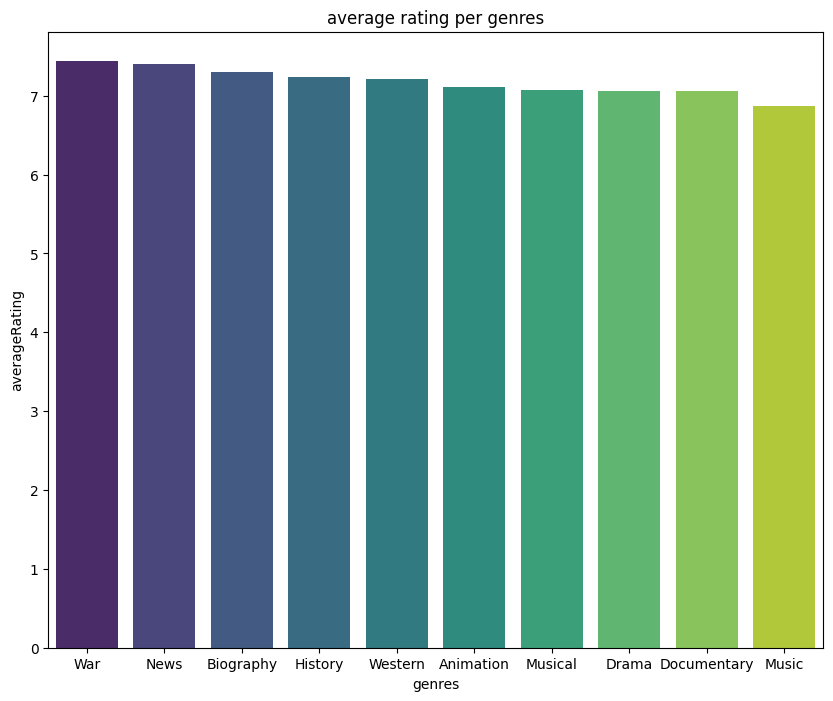

In [208]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_gen_rating,x="genres",y="averageRating",palette="viridis")
plt.title("average rating per genres")

#INSIGHTS
-- war movies have the highest average rating ~7.44 ,indicating that aidience generally rate them highly ,possibly due to strong strorytelling  and emotional depth.

**QUE 18) Are there genres that tends to have longer runtimes ?**

In [209]:
#we have already created variable for genres =new_df

In [210]:
new_df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [216]:
genres_runtime=new_df.groupby("genres")['runtimeMinutes'].mean().reset_index() #it is a seies thats why we use the reset index

In [217]:
genres_runtime

,genres,runtimeMinutes
0,Action,115.755764
1,Adventure,114.086130
2,Animation,94.621212
3,Biography,126.324675
4,Comedy,103.983844
5,Crime,114.711656
6,Documentary,101.307692
7,Drama,119.234112
8,Family,105.960894
9,Fantasy,114.086826


In [220]:
top_genres_runtime=genres_runtime.sort_values(by="runtimeMinutes",ascending=False).head(5)

In [221]:
top_genres_runtime

,genres,runtimeMinutes
10,History,136.494624
20,War,129.938776
3,Biography,126.324675
21,Western,123.500000
13,Musical,123.357143


In [222]:
#draw bar plot

<ipython-input-224-e1f1f53d97a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_runtime,x="genres",y="runtimeMinutes",palette="viridis")


Text(0.5, 1.0, 'average  runtime minutes per genres')

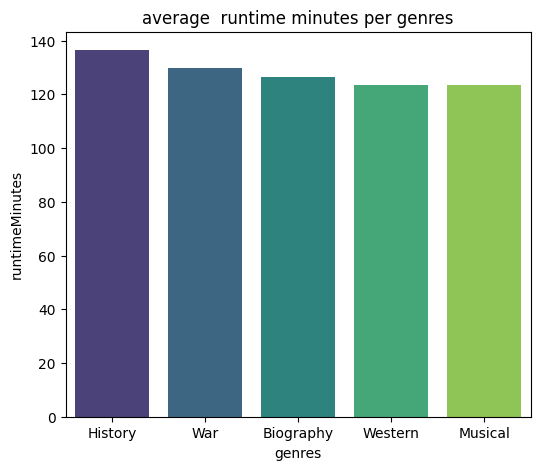

In [224]:
plt.figure(figsize=(6,5))
sns.barplot(data=top_genres_runtime,x="genres",y="runtimeMinutes",palette="viridis")
plt.title("average  runtime minutes per genres")

#INSIGHTS

-- History movies have the highest average runtime ~136 minutes ,likely due to their detailed storytelling.

-- war films ~129 minutes also tend to be long.

***QUE 19) Which genres has the most audience enguagement (numvotes)? ***

In [225]:
imdb.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [229]:
highest_vote=new_df.groupby("genres")["numVotes"].mean().reset_index()

In [230]:
highest_vote

,genres,numVotes
0,Action,250008.158839
1,Adventure,266700.069351
2,Animation,240425.070707
3,Biography,205938.056277
4,Comedy,172632.256803
5,Crime,211774.259202
6,Documentary,87228.384615
7,Drama,214272.029183
8,Family,187688.162011
9,Fantasy,229274.347305


In [233]:
top_highest_vote=highest_vote.head(10).sort_values(by="numVotes",ascending=False)

In [234]:
top_highest_vote

,genres,numVotes
1,Adventure,266700.069351
0,Action,250008.158839
2,Animation,240425.070707
9,Fantasy,229274.347305
7,Drama,214272.029183
5,Crime,211774.259202
3,Biography,205938.056277
8,Family,187688.162011
4,Comedy,172632.256803
6,Documentary,87228.384615


In [235]:
#draw bar plot

<ipython-input-237-b8e6d9a6dfdd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_highest_vote,x="genres",y="numVotes",palette="Set1")


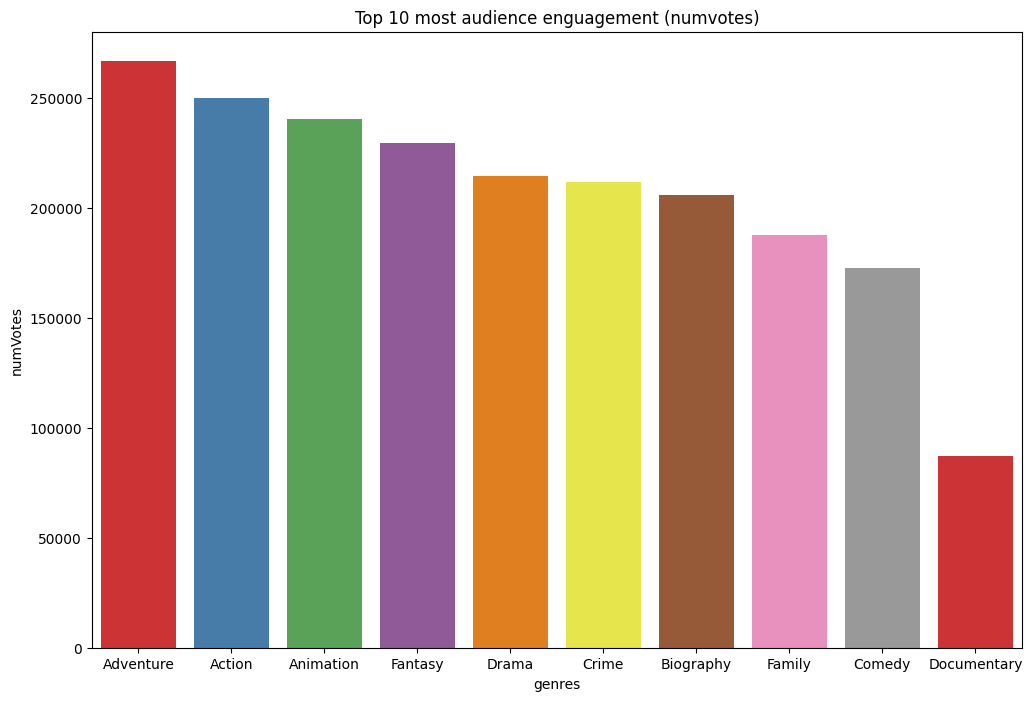

In [237]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_highest_vote,x="genres",y="numVotes",palette="Set1")
plt.title("Top 10 most audience enguagement (numvotes)")
plt.savefig("most audience enguagement (numvotes).jpg",dpi=500)

INSIGHTS

--Most Engaging Genres: Likely Action, Drama, Thriller, Sci-Fi (highest votes).

--Popularity vs. Engagement: More votes ≠ more movies. Some genres (e.g., Sci-Fi) have fewer movies but high votes.

--Why High Engagement? Strong fanbases (Action/Sci-Fi) & gripping stories (Thriller/Drama).

--Business Impact: High-vote genres are great for sequels & targeted marketing.